<a href="https://colab.research.google.com/github/wakayamahiro/-/blob/main/prowakayama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CNNを使用しMNISTで精度９８％を目指す**



必要なライブラリのインポート

In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

MNISTデータのダウンロード

In [ ]:
# データをダウンロードして、訓練とテストに分ける
(x_train, y_train), (x_test, y_test) = mnist.load_data()

画像データを学習で使える型に変換

２８ピクセル×２８ピクセルの形に変換する。

先ほど分けたデータを変換する

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

画像のカラーが225段階で表現されているので正規化をする。 そのために最大が１となるように255で割る

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')  
x_train /= 255
x_test /= 255

画像のデータをOne-Hot ベクトル形式に変換する。

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

畳み込みニューラルネットワーク

畳み込み層をConv2D()

プーリング層をMaxPooling2D()

In [ ]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

モデルのコンパイル

loss, optimizer，metricsの引数を入力する

目的関数0と1からなる配列であるため loss="categorical_crossentropy"

最適化を行う optimizer=keras.optimizers.Adadelta()　　　　　 optimizer="rmsprop"のどちらかが良いと考える

In [ ]:
# mode_cnn(畳み込みNN)のコンパイル
model_cnn.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=['accuracy'])
print("CNN model")
print(model_cnn.summary())

CNN model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)    

CNNの結果

精度を数字で表示させる。実行に時間がかかるためepochsはすくなめにする

validation_splitは学習データ(train)のうち、何％が検証データとして使用されるか
　　0.1～0.2くらいが妥当

In [ ]:
# エポック数の定義（NN、CNN共通）
epochs = 2

# CNNの学習
log_cnn = model_cnn.fit(x_train, y_train,
                    batch_size=128,
                    epochs=epochs,
                    verbose=1,
                    validation_split = 0.1)

## テストデータによる結果表示
score_cnn = model_cnn.evaluate(x_test, y_test, verbose=1, batch_size = 128)
print('Test loss:', score_cnn[0])
print('Test accuracy:', score_cnn[1])

Epoch 1/2
422/422 [==============================] - 132s 312ms/step - loss: 0.4829 - accuracy: 0.8469 - val_loss: 0.0623 - val_accuracy: 0.9828
Epoch 2/2
79/79 [==============================] - 6s 76ms/step - loss: 0.0401 - accuracy: 0.9869
Test loss: 0.040072001516819
Test accuracy: 0.9868999719619751


グラフを作る

plt.plot()で確認する

ここでは正解率のグラフのみ作成する

history属性は一連のエポックの訓練時の損失やメトリクスの値を記録

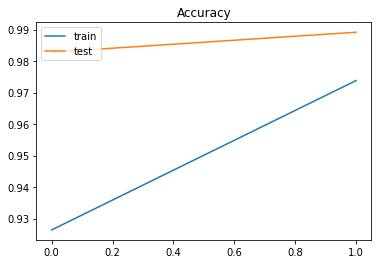

In [ ]:
plt.plot(log_cnn.history['accuracy'])
plt.plot(log_cnn.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

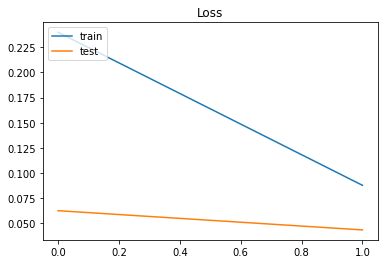

In [ ]:
plt.plot(log_cnn.history['loss'])
plt.plot(log_cnn.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

考察

初めにベースとなるプログラムを作成し、精度を98%にする目標があるので、エポックを２に固定してそれ以外のところで学習方法を変えて考える。変えるのは以下の二つである。

optimizer=keras.optimizers.Adadelta()

validation_split = 0.2

　　　Test loss: 2.1261701583862305

　　　Test accuracy: 0.6092000007629395

.

.

.

optimizer=keras.optimizers.Adadelta()

validation_split = 0.1

　　　Test loss: 2.1828067302703857

　　　Test accuracy: 0.5076000094413757

.

.

.
optimizer="rmsprop"

validation_split = 0.2

　　　est loss: 0.04007666930556297

　　　Test accuracy: 0.9868000149726868

.

.

.
optimizer="rmsprop"

validation_split = 0.1

　　　Test loss: 0.03014271892607212

　　　Test accuracy: 0.9904999732971191

.

.

.
はじめに実行したoptimizer=keras.optimizers.Adadelta()をoptimizer="rmsprop"に変更した途端に精度が向上した。

エポックを増やして実行して正解率を98%を達成しようと思ったらエポック２で完成した。

参考資料

ディープラーニングで手書き数字の判定をしよう！ 著:クジラ飛行机

https://colab.research.google.com/drive/1IVp4nPYAQCE5EBv-cLAY-qse0z5xSbMM#scrollTo=_50frvKsDYjm

MNIST

https://udemy.benesse.co.jp/ai/mnist.html

Sequentialモデル - Keras Documentation

https://keras.io/ja/models/sequential/

​